In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/named-entity-recognition/Audio/orange/orange08.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange11.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange02.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange01.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange03.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange10.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange15.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange07.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange12.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange13.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange04.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange14.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange06.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange09.wav
/kaggle/input/named-entity-recognition/Audio/orange/orange05.wav
/kaggle/input/named-entit

In [2]:
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
fpaths = [] ##Stores file paths
labels = [] #Stores categories corresponding to each target  
spoken = [] #Set of target words

audio_path = "/kaggle/input/named-entity-recognition/Audio"

for f in os.listdir(audio_path):
    for w in os.listdir(audio_path + '/' + f):
        fpaths.append(audio_path + '/'+ f + '/' + w)
        labels.append(f)
        if f not in spoken:
            spoken.append(f)
print('Words spoken:', spoken)

Words spoken: ['orange', 'book', 'lime', 'pineapple', 'eye', 'apple', 'dog', 'kiwi', 'fast', 'cat', 'peach', 'banana', 'god', 'human']


In [4]:
from scipy.io import wavfile

data = np.zeros((len(fpaths), 32000))
maxsize = -1
for n,file in enumerate(fpaths):
    _,d = wavfile.read(file)  ##Reads .wav file
    #print d.shape 
    data[n, :d.shape[0]] = d
    if d.shape[0] > maxsize:
        maxsize = d.shape[0]
data = data[:, :maxsize]  ##Changing of dimensions

#print("Number of files total:", data.shape[0])
all_labels = np.zeros(data.shape[0])
for n, l in enumerate(set(labels)):
    all_labels[np.array([i for i, _ in enumerate(labels) if _ == l])] = n
print('Labels and label indices', all_labels)

Labels and label indices [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  8.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  7.  7.  7.
  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  7.  6.  6.  6.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.]


In [5]:
import scipy
def stft(x, fftsize = 64, overlap_pct=0.5):##Computes STFT(short time Fourier Transform)
    hop = int(fftsize * (1-overlap_pct))
    w = scipy.hanning(fftsize + 1)[:-1]
    raw = np.array([np.fft.rfft(w * x[i:i+fftsize]) for i in range(0, len(x) - fftsize, hop)])
    return raw[:,:(fftsize // 2)]

(216, 32)


/tmp/ipykernel_33/4126547528.py:4: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  w = scipy.hanning(fftsize + 1)[:-1]


Text(0.5, 1.0, 'PSD of orange example')

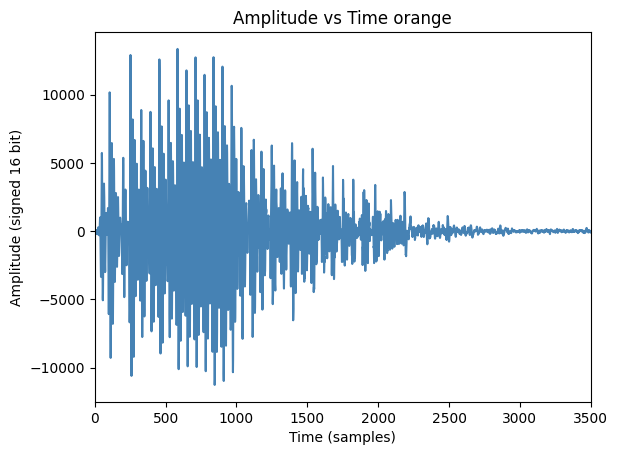

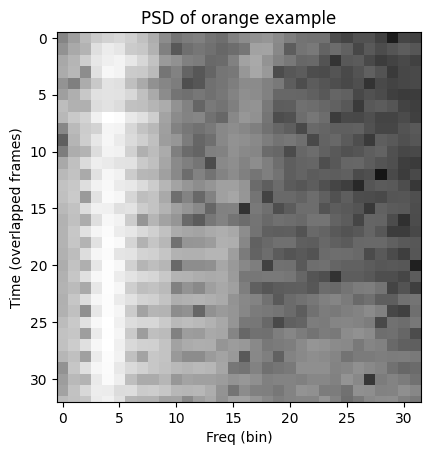

In [6]:
plt.plot(data[0, :], color='steelblue')  #Plots the signal in time domain
plt.title('Amplitude vs Time %s'%labels[0])
plt.xlim(0, 3500)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude (signed 16 bit)')
plt.figure()

# + 1 to avoid log of 0
log_freq = 20 * np.log(np.abs(stft(data[0, :])) + 1) ##Plots power spectral density in freq domain
print(log_freq.shape)
plt.imshow(log_freq, cmap='gray', interpolation=None)
plt.xlabel('Freq (bin)')
plt.ylabel('Time (overlapped frames)')
plt.ylim(log_freq.shape[1])
plt.title('PSD of %s example'%labels[0])

In [7]:
from numpy.lib.stride_tricks import as_strided

def peakfind(x, n_peaks, l_size=3, r_size=3, c_size=3, f=np.mean):  ##Gives location of peaks in time domain
    win_size = l_size + r_size + c_size
    shape = x.shape[:-1] + (x.shape[-1]-win_size+1, win_size)
    strides = x.strides + (x.strides[-1],)
    xs = as_strided(x, shape=shape, strides=strides)
    def is_peak(x):
        centered = (np.argmax(x) == l_size + int(c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size + c_size]
        r = x[-r_size:]
        passes = np.max(c) > np.max([f(l), f(r)])
        if centered and passes:
            return np.max(c)
        else:
            return -1
    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    #Add l_size and half - 1 of center size to get to actual peak location
    top[top > -1] = top[top > -1] + l_size + int(c_size / 2.)
    return heights, top[:n_peaks]

/tmp/ipykernel_33/4126547528.py:4: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  w = scipy.hanning(fftsize + 1)[:-1]


Text(0, 0.5, 'Amplitude')

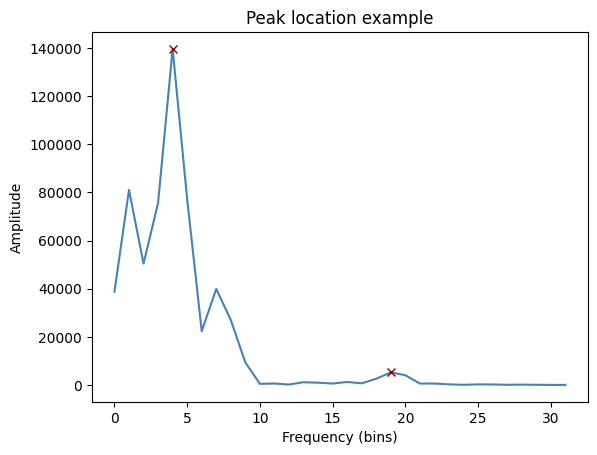

In [8]:
plot_data = np.abs(stft(data[20, :]))[15, :] 
values, locs = peakfind(plot_data, n_peaks=8)
fp = locs[values > -1]
fv = values[values > -1]
plt.plot(plot_data, color='steelblue')
plt.plot(fp, fv, 'x', color='darkred')
plt.title('Peak location example')
plt.xlabel('Frequency (bins)')
plt.ylabel('Amplitude')

In [9]:
all_obs = []  ##processes each example(calculates STFT and find peaks) feature to the model
for i in range(data.shape[0]):
    d = np.abs(stft(data[i, :]))
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    for r in range(d.shape[0]):
        _,t = peakfind(d[r,:], n_peaks=n_dim)
        obs[:,r]=t.copy()
    if i%10==0:
        print("Processed obs %s" % i)
    all_obs.append(obs)

all_obs = np.atleast_3d(all_obs)

/tmp/ipykernel_33/4126547528.py:4: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  w = scipy.hanning(fftsize + 1)[:-1]


Processed obs 0
Processed obs 10
Processed obs 20
Processed obs 30
Processed obs 40
Processed obs 50
Processed obs 60
Processed obs 70
Processed obs 80
Processed obs 90
Processed obs 100
Processed obs 110
Processed obs 120
Processed obs 130
Processed obs 140
Processed obs 150
Processed obs 160
Processed obs 170
Processed obs 180
Processed obs 190
Processed obs 200
Processed obs 210
Processed obs 220


In [10]:
print(all_obs.shape)
print(data.shape)

(225, 6, 216)
(225, 6966)


In [11]:
import scipy.stats as st
from scipy.stats import multivariate_normal
import numpy as np

class gmmhmm:  ##Creation of a Gaussian HMM
    def __init__(self, n_states):
        self.n_states = n_states
        self.random_state = np.random.RandomState(0)
        
        self.prior = self._normalize(self.random_state.rand(self.n_states, 1))
        self.A = self._stochasticize(self.random_state.rand(self.n_states, self.n_states))
        
        self.mu = None
        self.covs = None
        self.n_dims = None
    
    def _forward(self, B):
        log_likelihood = 0
        T = B.shape[1]
        alpha = np.zeros(B.shape)
        for t in range(T):
            if t == 0:
                alpha[:,t] = B[:,t] * self.prior.ravel()
            else:
                alpha[:,t] = B[:,t] * np.dot(self.A.T, alpha[:,t-1])
            
            alpha_sum = np.sum(alpha[:,t])
            alpha[:,t]/=alpha_sum
            log_likelihood = log_likelihood + np.log(alpha_sum)
        return log_likelihood, alpha
    
    def _backward(self, B):
        T = B.shape[1]
        beta = np.zeros(B.shape)
        
        beta[:,-1] = np.ones(B.shape[0])
        
        for t in range(T-1)[::-1]:
            beta[:,t] = np.dot(self.A, (B[:,t+1]*beta[:,t+1]))
            beta[:,t]/=np.sum(beta[:,t])
        return beta
    
    def _state_likelihood(self,obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.n_states, obs.shape[1]))
        for s in range(self.n_states):
            np.random.seed(self.random_state.randint(1))
            B[s,:] = st.multivariate_normal.pdf(
                obs.T, mean = self.mu[:,s].T, cov=self.covs[:,:,s].T)
        return B
    
    def _normalize(self,x):
        return (x+(x==0))/np.sum(x)
    
    def _stochasticize(self,x):
        return (x+(x==0))/np.sum(x,axis=1)
    
    def _em_init(self, obs):
        #Using this _em_init function allows for less required constructor args
        if self.n_dims is None:
            self.n_dims = obs.shape[0]
        if self.mu is None:
            subset = self.random_state.choice(np.arange(self.n_dims), size=self.n_states, replace=False)
            self.mu = obs[:, subset]
        if self.covs is None:
            self.covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
            self.covs += np.diag(np.diag(np.cov(obs)))[:, :, None]
        return self
    
    def _em_step(self, obs): 
        obs = np.atleast_2d(obs)
        B = self._state_likelihood(obs)
        T = obs.shape[1]
        
        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)
        
        xi_sum = np.zeros((self.n_states, self.n_states))
        gamma = np.zeros((self.n_states, T))
        
        for t in range(T - 1):
            partial_sum = self.A * np.dot(alpha[:, t], (beta[:, t] * B[:, t + 1]).T)
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)
              
        partial_g = alpha[:, -1] * beta[:, -1]
        gamma[:, -1] = self._normalize(partial_g)
        
        expected_prior = gamma[:, 0]
        expected_A = self._stochasticize(xi_sum)
        
        expected_mu = np.zeros((self.n_dims, self.n_states))
        expected_covs = np.zeros((self.n_dims, self.n_dims, self.n_states))
        
        gamma_state_sum = np.sum(gamma, axis=1)
        #Set zeros to 1 before dividing
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)
        
        for s in range(self.n_states):
            gamma_obs = obs * gamma[s, :]
            expected_mu[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]
            partial_covs = np.dot(gamma_obs, obs.T) / gamma_state_sum[s] - np.dot(expected_mu[:, s], expected_mu[:, s].T)
            #Symmetrize
            partial_covs = np.triu(partial_covs) + np.triu(partial_covs).T - np.diag(partial_covs)
        
        #Ensure positive semidefinite by adding diagonal loading
        expected_covs += .01 * np.eye(self.n_dims)[:, :, None]
        
        self.prior = expected_prior
        self.mu = expected_mu
        self.covs = expected_covs
        self.A = expected_A
        return log_likelihood
    
    def fit(self, obs, n_iter=8):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            for i in range(n_iter):
                self._em_init(obs)
                log_likelihood = self._em_step(obs)
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            for n in range(count):
                for i in range(n_iter):
                    self._em_init(obs[n, :, :])
                    log_likelihood = self._em_step(obs[n, :, :])
        return self
    
    def transform(self, obs):
        #Support for 2D and 3D arrays
        #2D should be n_features, n_dims
        #3D should be n_examples, n_features, n_dims
        #For example, with 6 features per speech segment, 105 different words
        #this array should be size
        #(105, 6, X) where X is the number of frames with features extracted
        #For a single example file, the array should be size (6, X)
        if len(obs.shape) == 2:
            B = self._state_likelihood(obs)
            log_likelihood, _ = self._forward(B)
            return log_likelihood
        elif len(obs.shape) == 3:
            count = obs.shape[0]
            out = np.zeros((count,))
            for n in range(count):
                B = self._state_likelihood(obs[n, :, :])
                log_likelihood, _ = self._forward(B)
                out[n] = log_likelihood
            return out

if __name__ == "__main__":
    rstate = np.random.RandomState(0)
    t1 = np.ones((4, 40)) + .001 * rstate.rand(4, 40)
    t1 /= t1.sum(axis=0)
    t2 = rstate.rand(*t1.shape)
    t2 /= t2.sum(axis=0)
    
    m1 = gmmhmm(2)
    m1.fit(t1)
    m2 = gmmhmm(2)
    m2.fit(t2)
    
    m1t1 = m1.transform(t1)
    m2t1 = m2.transform(t1)
    print("Likelihoods for test set 1")
    print("M1:", m1t1)
    print("M2:", m2t1)
    print("Prediction for test set 1")
    print("Model", np.argmax([m1t1, m2t1]) + 1)
    print()
    
    m1t2 = m1.transform(t2)
    m2t2 = m2.transform(t2)
    print("Likelihoods for test set 2")
    print("M1:", m1t2)
    print("M2:", m2t2)
    print("Prediction for test set 2")
    print("Model", np.argmax([m1t2, m2t2]) + 1)

Likelihoods for test set 1
M1: 221.3941427176605
M2: 165.68854588913212
Prediction for test set 1
Model 1

Likelihoods for test set 2
M1: 33.20045732115577
M2: 60.30510397138956
Prediction for test set 2
Model 2


In [12]:
from sklearn.model_selection import train_test_split

# Normalize the data
for n, obs in enumerate(all_obs):
    all_obs[n] /= obs.sum(axis=0)

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(all_obs, all_labels, test_size=0.1, random_state=0, stratify=all_labels)

print('Size of training matrix:', X_train.shape)
print('Size of testing matrix:', X_test.shape)

Size of training matrix: (202, 6, 216)
Size of testing matrix: (23, 6, 216)


In [13]:
set(all_labels)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0}

In [14]:
ys = set(all_labels)
ms = [gmmhmm(6) for y in ys] ##Gaussian HMM with six states
_ = [m.fit(X_train[y_train == y, :, :]) for m, y in zip(ms, ys)]
ps = [m.transform(X_test) for m in ms]
res = np.vstack(ps)
predicted_labels = np.argmax(res, axis=0)
dictionary = ['orange', 'book', 'lime', 'pineapple', 'eye', 'apple', 'dog', 'kiwi', 'fast', 'cat', 'peach', 'banana', 'god', 'human']
missed = (predicted_labels != y_test)
print('Test accuracy: %.2f percent' % (100 * (1 - np.mean(missed))))

Test accuracy: 56.52 percent


In [16]:
##Accesibility
##Tried classifying live recorded sample :)

import numpy as np
from sys import byteorder
from array import array
from struct import pack

import pyaudio
import wave
import time
%matplotlib inline
THRESHOLD = 32000
CHUNK_SIZE = 64
FORMAT = pyaudio.paInt16
RATE = 8000

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)

    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r

def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r

    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data

def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    r = array('h', [0 for i in xrange(int(seconds*RATE))])
    r.extend(snd_data)
    r.extend([0 for i in xrange(int(seconds*RATE))])
    return r

def record():
    """
    Record a word or words from the microphone and 
    return the data as an array of signed shorts.

    Normalizes the audio, trims silence from the 
    start and end, and pads with 0.5 seconds of 
    blank sound to make sure VLC et al can play 
    it without getting chopped off.
    """
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE,
        input=True, output=True,
        frames_per_buffer=CHUNK_SIZE)

    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > 30:
            break

    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.01)
    return sample_width, r

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()

if __name__ == '__main__':
    #print("start")
    
    s=['orange', 'book', 'lime', 'pineapple', 'eye', 'apple', 'dog', 'kiwi', 'fast', 'cat', 'peach', 'banana', 'god', 'human']
    for i,name in enumerate(s):
        pathstart= "/home/ashutosh/Downloads/hmm-speech-recognition-0.1/hmm-speech-recognition-0.1/Audio/" + name
        for i in range(15):
            print("Please speak a word into the microphone for " + name)
            record_to_file(pathstart+"/"+ name + str(i))
            time.sleep(0.5)
        time.sleep(5)
        print("Done")
    print("Please speak a word into the microphone for ")
    record_to_file('/home/ashutosh/Downloads/Speech_Recognition/Audio/testaudio.wav')
    print("Done")

new_data = np.zeros(5000)
maxsize = 3841
_, new_d = wavfile.read("/home/ashutosh/Downloads/Speech_Recognition/test")
new_data[:new_d.shape[0]] = new_d
new_data = new_data[:maxsize]

observation = []

new_d = np.abs(stft(new_data))
n_dim = 6
new_obs = np.zeros((n_dim, new_d.shape[0]))
for r in range(new_d.shape[0]):
    _, t = peakfind(new_d[r, :], n_peaks=n_dim)
    new_obs[:, r] = t.copy()
observation.append(new_obs)
    
observation = np.atleast_3d(observation)
observation /= observation.sum(axis=1)

ps_test = [m.transform(observation) for m in ms]
res_test = np.vstack(ps_test)
test_predicted_label = np.argmax(res_test, axis=0)
word_spoken = dictionary[test_predicted_label]
print word_spoken

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (2611584837.py, line 158)